In [1]:
import crocoddyl
import numpy as np
from models.cartpole import ActionModelCartpole, ActionDataCartpole
from utils.cartpole_utils import animateCartpole
from IPython.display import HTML

In [2]:
# Create an action model, data, and its NumDiff's action
model = ActionModelCartpole()
data = model.createData()
# Generate a random state and control
x = model.state.rand()
u = np.random.rand(1)

# Compute analytical and NumDiff derivatives
# Create a shooting problem with 50 running nodes (i.e., 50 * 5e-2 = 2.5 sec)
N = 50
x0 = np.array([0.0, 0.0, 1.0, 0.5])
problem = crocoddyl.ShootingProblem(x0, [model] * N, model)

xs = problem.rollout([np.zeros(model.nu)] * N)

In [3]:
# Creating the FDDP solver and setting the logger callback
solver = crocoddyl.SolverDDP(problem)
solver.setCallbacks([crocoddyl.CallbackVerbose()])

# Solving this problem and display the optimal trajectory of our cart-pole system
solver.solve()

iter    cost       merit      stop      |grad|      preg       dreg      step   ||ffeas||  ||gfeas||  ||hfeas||   dV-exp       dV      dPhi-exp     dPhi
   0  4.844e+00  0.000e+00  0.000e+00  0.000e+00  1.000e-09  1.000e-09  1.0000  1.000e+00  0.000e+00  0.000e+00  0.000e+00 -4.844e+00  0.000e+00  0.000e+00
   1  4.844e+00  0.000e+00  2.809e-06  5.618e-06  1.000e-09  1.000e-09  1.0000  0.000e+00  0.000e+00  0.000e+00  2.809e-06  2.806e-06  0.000e+00  0.000e+00
   2  4.844e+00  0.000e+00  3.516e-12  7.033e-12  1.000e-09  1.000e-09  1.0000  0.000e+00  0.000e+00  0.000e+00  3.516e-12  3.510e-12  0.000e+00  0.000e+00


True

processing the animation ... 
... processing done


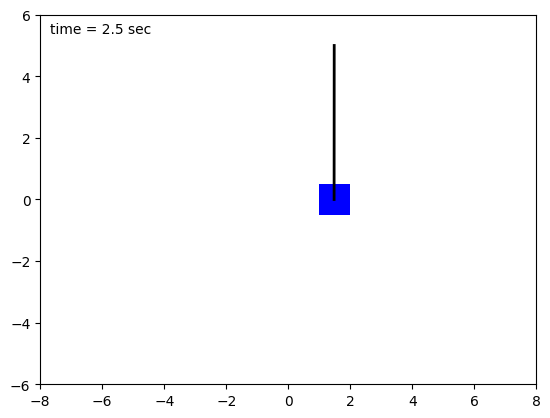

In [4]:
anim = animateCartpole(solver.xs)

HTML(anim.to_jshtml())